In [15]:
import numpy as np
from qiskit import QuantumCircuit

In [46]:
want_colors = 1 # from input 1=color, 0=b/w

In [47]:
# Create a Quantum Circuit acting on a quantum register of seven qubits
qubits = 7
circ = QuantumCircuit(qubits)

#always is variable 0-1
circ.h(1) #shape
circ.h(5) #rot1
circ.h(6) #rot2

# set q0 to 1 if wants colors
if want_colors:
    circ.x(0)

# Set colors to 0-1 if q0 is 1 (want_colors)
circ.ch(0, 2) #colors1 0-1 if q0 is 1
circ.ch(0, 3) #colors2 0-1 if q0 is 1

# Set b/w-w/b to 0-1 if !want_colors
circ.x(0) #invert q0
circ.ch(0, 4) #b/w 0-1 if q0 is 1 now


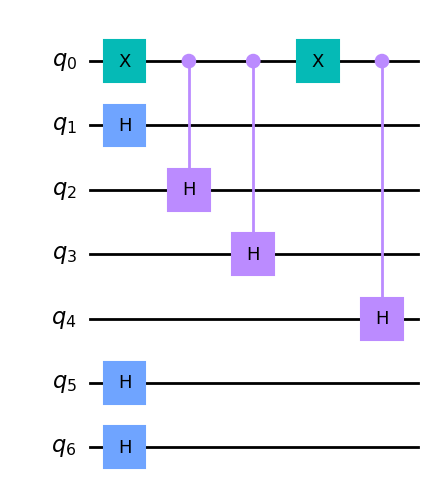

In [48]:
circ.draw('mpl')

In [49]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**qubits)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [50]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

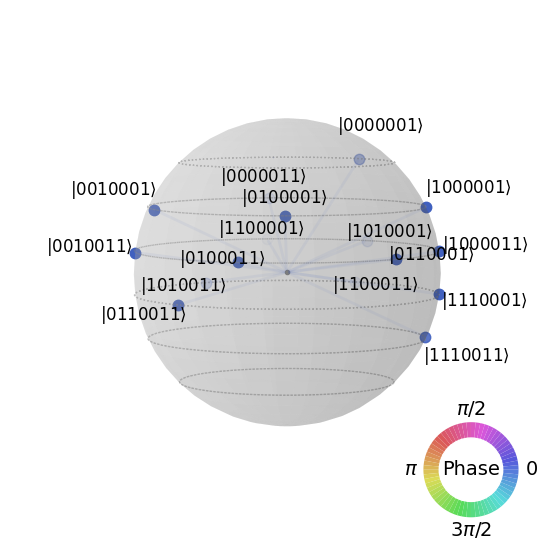

In [30]:
state.draw('qsphere')

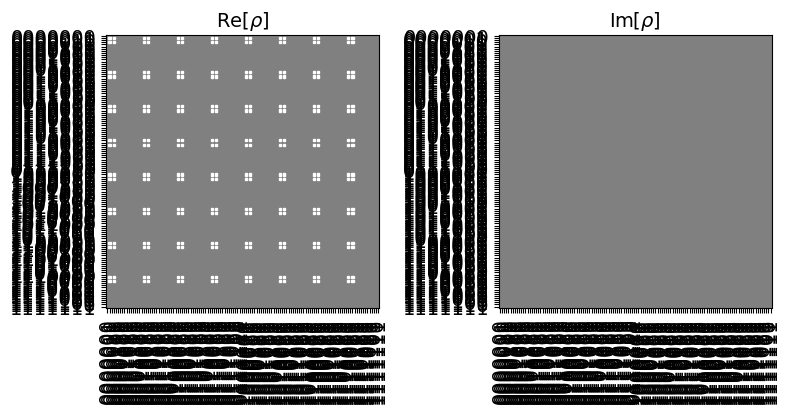

In [31]:
state.draw('hinton')

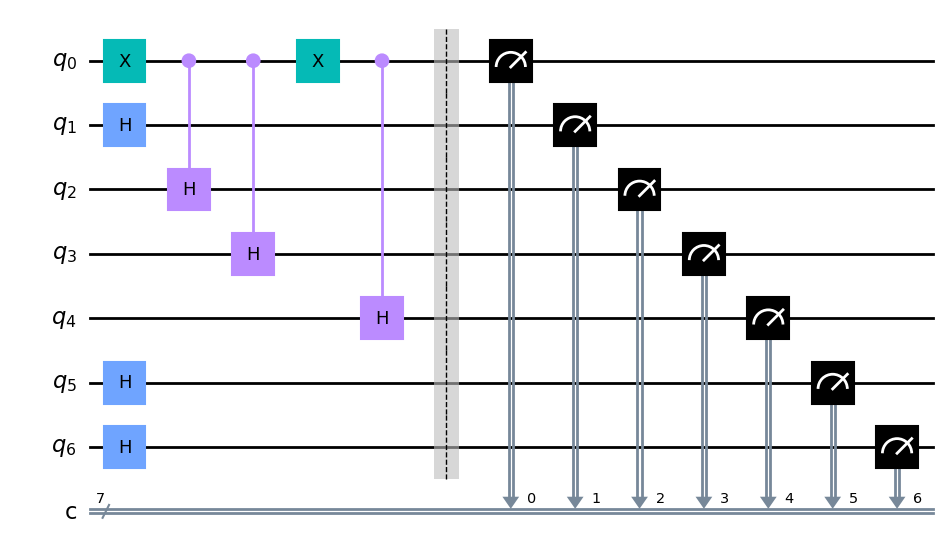

In [51]:
# Create a Quantum Circuit
meas = QuantumCircuit(qubits, qubits)
meas.barrier(range(qubits))
# map the quantum measurement to the classical bits
meas.measure(range(qubits), range(qubits))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(qubits), front=True)

#drawing the circuit
qc.draw('mpl')

In [52]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile 

# Use AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 


qc.save_statevector(label = 'test', pershot = True)
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
x = 10
y = 11
job_sim = backend.run(qc_compiled, shots=x*y, memory=True)

# Grab the results from the job.
result_sim = job_sim.result()

memory = result_sim.get_memory(0)
print(memory)
print(len(memory))
# result = execute(qc2, backend = backend, shots = 10).result()
# for i in range(0,5):
#     print(result_sim.data(0)['test'][i].probabilities(qargs=None, decimals=0))

['1001000', '1101000', '1100110', '1100000', '1001110', '1000000', '0101100', '0101000', '0100000', '1000110', '0001110', '0001000', '0000000', '0000000', '1000000', '0001110', '0101000', '0000100', '0101110', '1000110', '1000000', '0101110', '1001000', '0101010', '1100000', '0101010', '1100100', '1000010', '0000000', '1000010', '1000000', '1101010', '1100010', '1100110', '1000100', '0000100', '0101110', '1000100', '0001100', '1000010', '1100100', '1000010', '0001110', '0101110', '0100010', '0001100', '0101100', '1001100', '1101110', '0000010', '0000000', '1000100', '1000100', '1100100', '0101000', '1100110', '1000110', '0000110', '0001000', '1100010', '1101110', '0101000', '0001110', '1000110', '0101000', '1000100', '0000110', '1100110', '1000000', '0100000', '1101110', '1000100', '1101000', '0100000', '0001100', '1100100', '1000100', '1000110', '1101110', '0000000', '0101000', '1101010', '1100100', '1101010', '1000100', '0000000', '0101100', '0000000', '0000010', '0001100', '0100010'

In [53]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'1001100': 1, '0100010': 2, '0000010': 3, '1000010': 4, '1101010': 4, '1100010': 2, '0001100': 4, '1100100': 6, '0101110': 6, '1001000': 4, '0000100': 2, '0101100': 3, '1101110': 5, '1000100': 9, '0101000': 7, '0101010': 2, '1100110': 5, '1100000': 3, '1000110': 6, '1001110': 2, '1000000': 5, '1101000': 2, '0000000': 9, '0100000': 3, '0100100': 2, '0001110': 4, '0000110': 2, '0001000': 3}


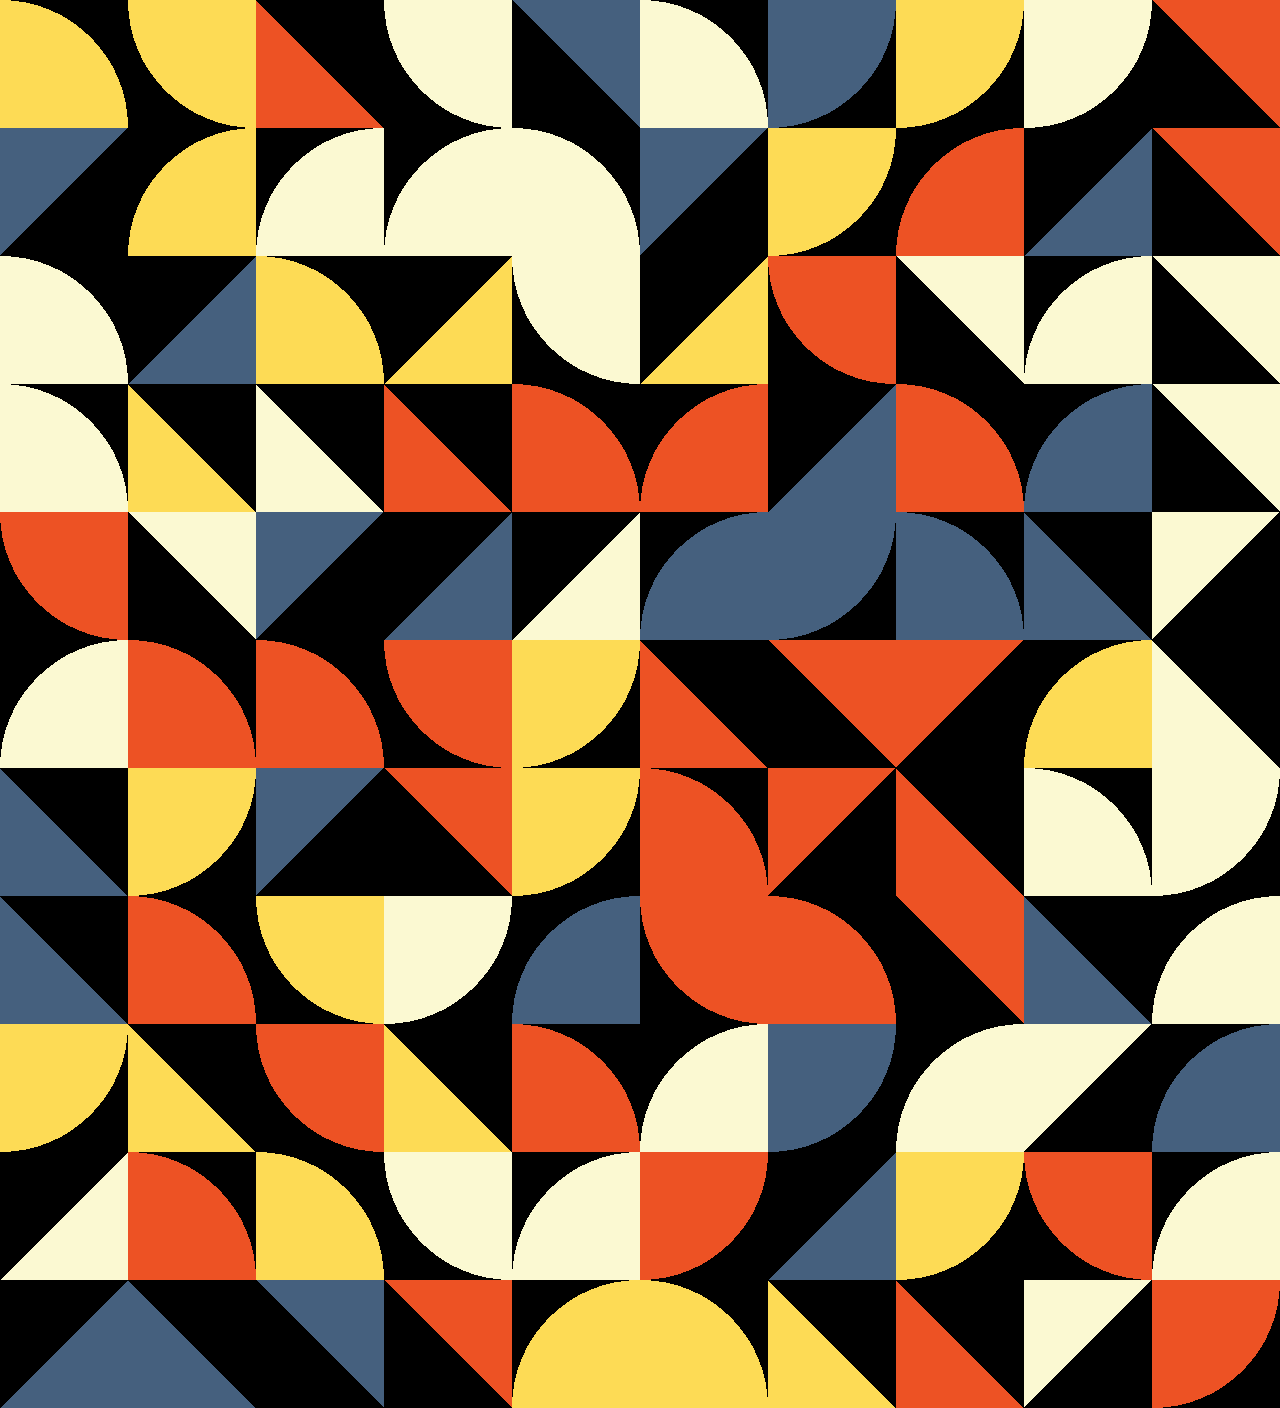

In [54]:
from PIL import Image, ImageDraw, ImageFilter

tile_size = 128
image = Image.new(mode="RGB", size=(x*tile_size, y*tile_size))

for idx, i in enumerate(memory):
    tile_x = idx % x
    tile_y = idx // x
    im = Image.open('tiles/'+i[::-1]+'.png') #reverse output
    image.paste(im, (tile_x*tile_size, tile_y*tile_size))
image.save('output.png', quality=100)
display(image)

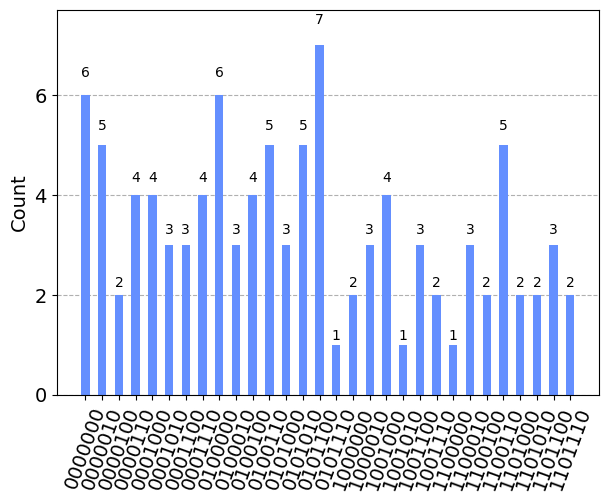

In [45]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)